array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

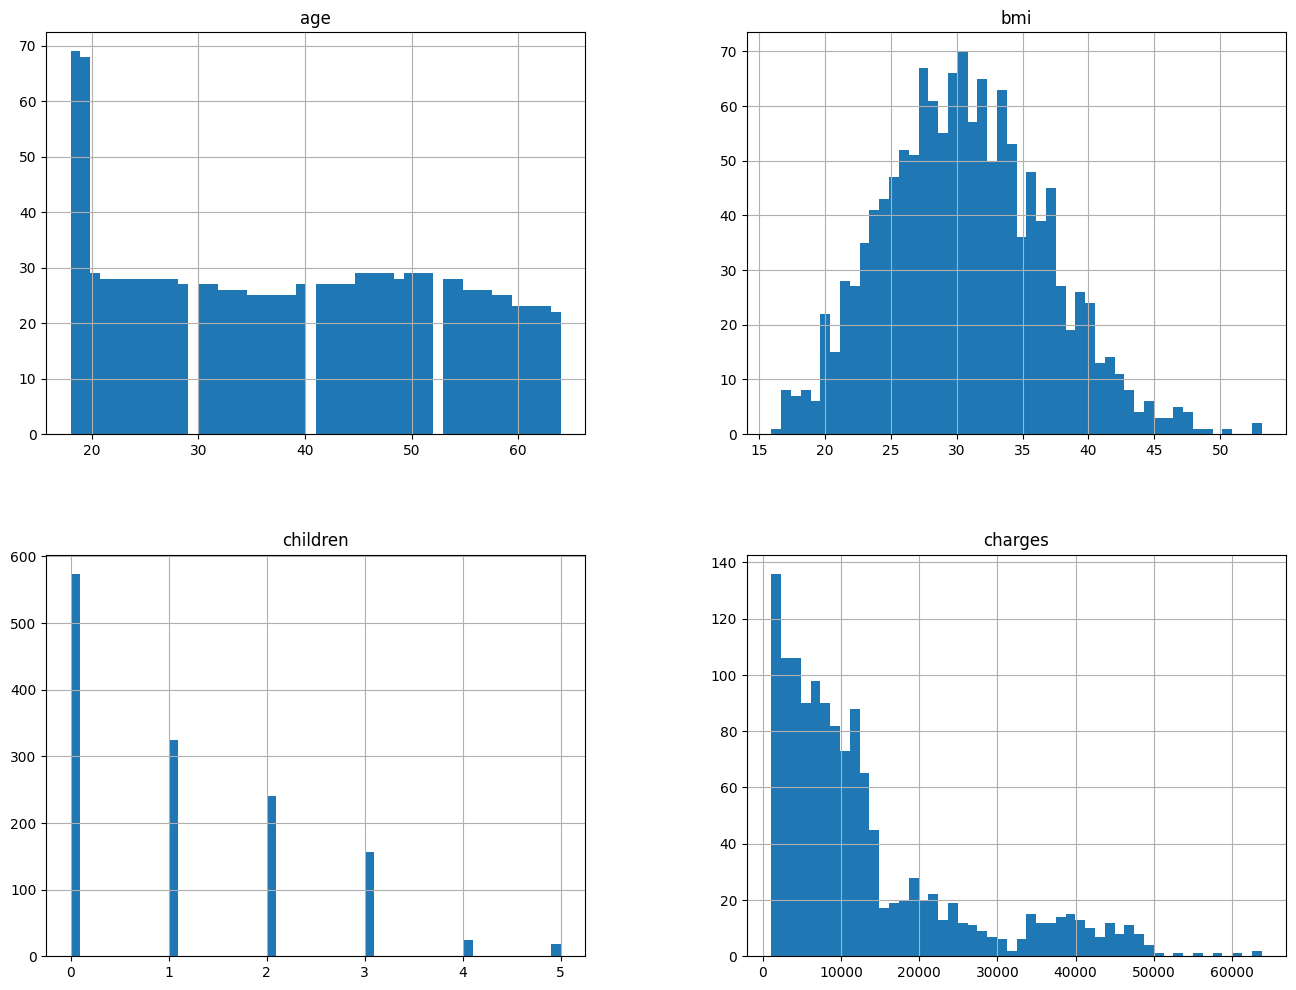

In [7]:
# %%
import pandas as pd

df = pd.read_csv(r"C:\Users\palla\OneDrive\Documents\Coding Projects\Healthcare Insurance Dataset project\insurance.csv")

# %%
df.describe()

df.hist(figsize=(16, 12), bins=50)
        





<Axes: xlabel='bmi', ylabel='charges'>

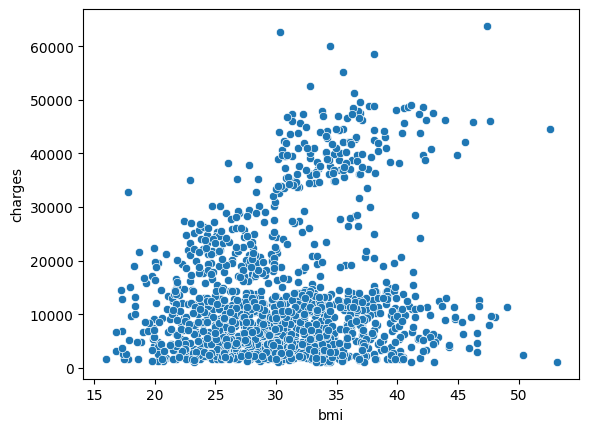

In [8]:
import seaborn as sns

sns.scatterplot(x="bmi", y="charges", data=df)

<Axes: xlabel='age', ylabel='charges'>

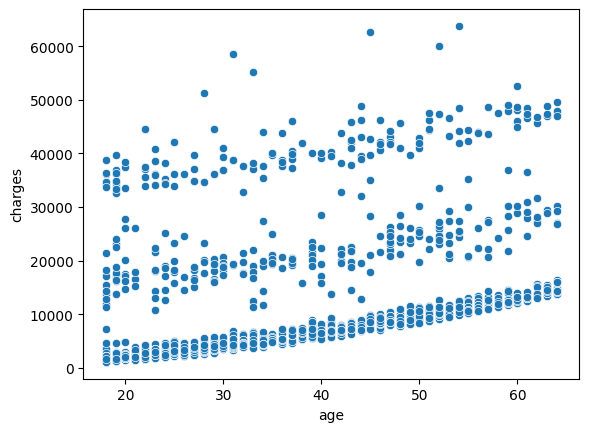

In [9]:
sns.scatterplot(x="age", y="charges", data=df)

<Axes: xlabel='smoker', ylabel='charges'>

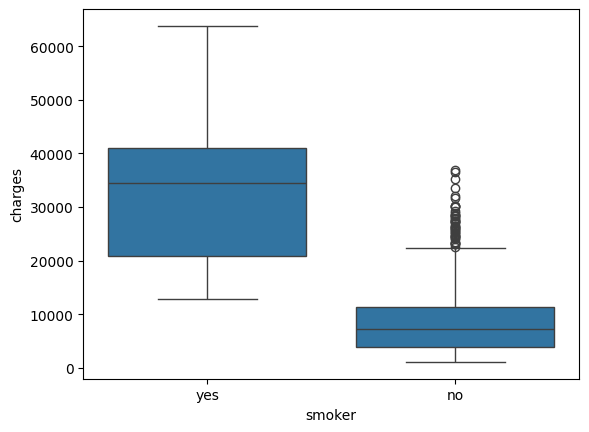

In [10]:
sns.boxplot(x="smoker", y="charges", data=df)

In [11]:
df.dtypes


age           int64
sex             str
bmi         float64
children      int64
smoker          str
region          str
charges     float64
dtype: object

In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [18]:
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

predictions = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)

RMSE: 5796.2846592762735


In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print("Random Forest RMSE:", rf_rmse)


Random Forest RMSE: 4586.935636079838


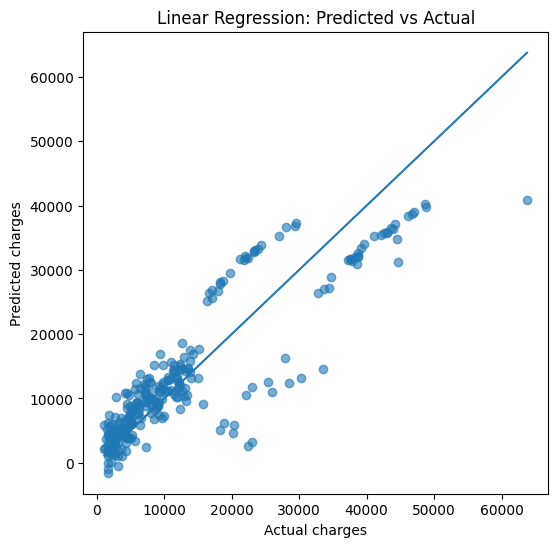

In [21]:
import matplotlib.pyplot as plt

# Linear model
lin_pred = model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, lin_pred, alpha=0.6)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Linear Regression: Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])  # perfect line
plt.show()


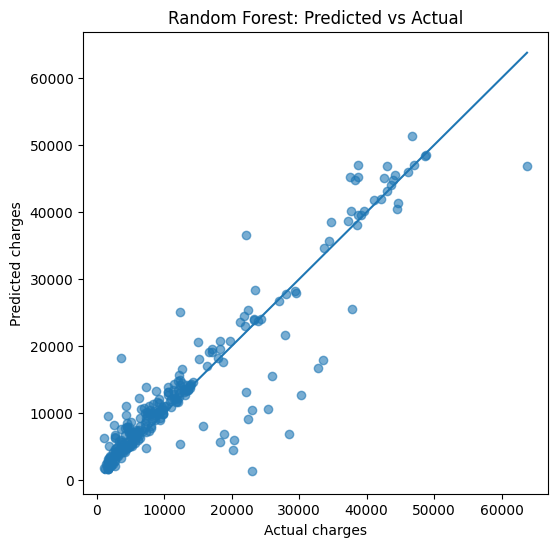

In [22]:
rf_pred = rf.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, alpha=0.6)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Random Forest: Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()


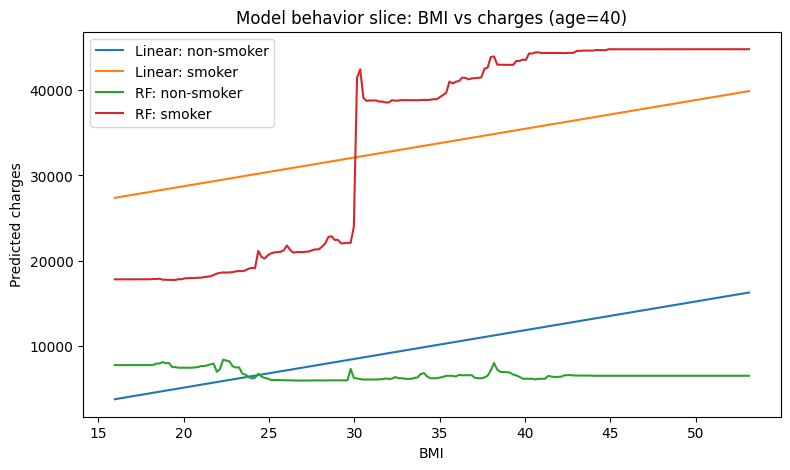

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Build a grid over BMI
bmi_grid = np.linspace(df["bmi"].min(), df["bmi"].max(), 200)

def make_rows(smoker_yes, age=40, children=0, sex_male=0, region="northeast"):
    rows = pd.DataFrame({
        "age": age,
        "bmi": bmi_grid,
        "children": children,
        "sex_male": sex_male,
        "smoker_yes": smoker_yes,
        "region_northwest": 0,
        "region_southeast": 0,
        "region_southwest": 0,
    })
    # set region dummies (baseline northeast = all zeros)
    if region == "northwest":
        rows["region_northwest"] = 1
    elif region == "southeast":
        rows["region_southeast"] = 1
    elif region == "southwest":
        rows["region_southwest"] = 1
    return rows

X_ns = make_rows(smoker_yes=0)
X_s  = make_rows(smoker_yes=1)

# Ensure column order matches training
X_ns = X_ns[X.columns]
X_s  = X_s[X.columns]

lin_ns = model.predict(X_ns)
lin_s  = model.predict(X_s)

rf_ns = rf.predict(X_ns)
rf_s  = rf.predict(X_s)

plt.figure(figsize=(9,5))
plt.plot(bmi_grid, lin_ns, label="Linear: non-smoker")
plt.plot(bmi_grid, lin_s,  label="Linear: smoker")
plt.plot(bmi_grid, rf_ns,  label="RF: non-smoker")
plt.plot(bmi_grid, rf_s,   label="RF: smoker")
plt.xlabel("BMI")
plt.ylabel("Predicted charges")
plt.title("Model behavior slice: BMI vs charges (age=40)")
plt.legend()
plt.show()


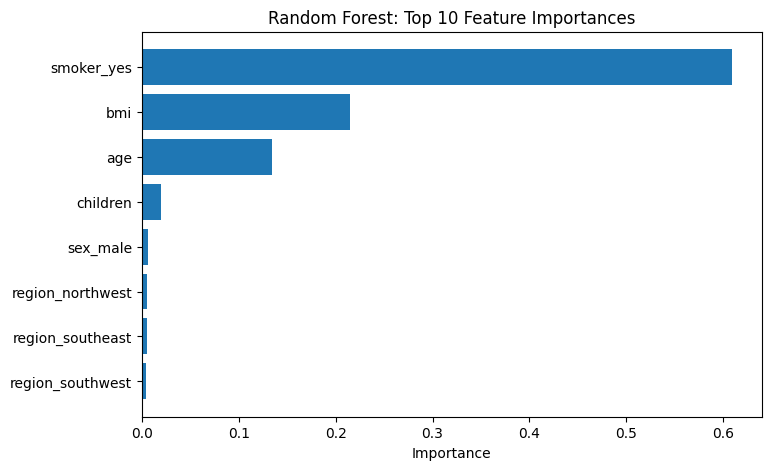

In [25]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

top10 = importances.head(10).sort_values()

plt.figure(figsize=(8,5))
plt.barh(top10.index, top10.values)
plt.xlabel("Importance")
plt.title("Random Forest: Top 10 Feature Importances")
plt.show()

